In [68]:
import pandas as pd

file_path = r'd:\mydoc\projs\jupyter\pokemon.xlsx'

# 查看所有工作表的准确名称
xl = pd.ExcelFile(file_path)
sheet_names = xl.sheet_names
print("文件中实际的工作表名称：", sheet_names)
print("工作表名称的类型：", [type(name) for name in sheet_names])

# 显示每个名称的详细信息
for i, name in enumerate(sheet_names):
    print(f"工作表 {i}: '{name}' (长度: {len(name)})")
    

文件中实际的工作表名称： ['a', 'b']
工作表名称的类型： [<class 'str'>, <class 'str'>]
工作表 0: 'a' (长度: 1)
工作表 1: 'b' (长度: 1)


In [90]:
import pandas as pd
src_data=pd.read_excel(r'd:\mydoc\projs\jupyter\pokemon.xlsx','a')
src_data.info()
src_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   中文名称             9 non-null      int64  
 1   generation       9 non-null      int64  
 2   attack           9 non-null      int64  
 3   defense          9 non-null      int64  
 4   capture_rate     9 non-null      int64  
 5   percentage_male  9 non-null      int64  
 6   1                0 non-null      float64
 7   2                0 non-null      float64
 8   3                0 non-null      float64
 9   4                0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 852.0 bytes


,中文名称,generation,attack,defense,capture_rate,percentage_male,1,2,3,4
0,11,1,49,60,45,88,NaN,NaN,NaN,NaN
1,12,1,48,60,45,88,NaN,NaN,NaN,NaN
2,21,2,60,80,50,75,NaN,NaN,NaN,NaN
3,22,2,70,80,50,75,NaN,NaN,NaN,NaN
4,23,2,61,80,53,72,NaN,NaN,NaN,NaN
5,31,3,90,120,70,45,NaN,NaN,NaN,NaN
6,32,3,94,120,70,46,NaN,NaN,NaN,NaN
7,33,3,89,120,75,42,NaN,NaN,NaN,NaN
8,34,3,90,120,76,43,NaN,NaN,NaN,NaN


In [91]:
new_data=src_data[['中文名称','generation','attack','defense','capture_rate','percentage_male']]
new_data

,中文名称,generation,attack,defense,capture_rate,percentage_male
0,11,1,49,60,45,88
1,12,1,48,60,45,88
2,21,2,60,80,50,75
3,22,2,70,80,50,75
4,23,2,61,80,53,72
5,31,3,90,120,70,45
6,32,3,94,120,70,46
7,33,3,89,120,75,42
8,34,3,90,120,76,43


In [92]:
new_data['战斗力']=(new_data['attack']+new_data['defense'])/2
new_data

C:\Users\trust\AppData\Local\Temp\ipykernel_9904\471691284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['战斗力']=(new_data['attack']+new_data['defense'])/2


,中文名称,generation,attack,defense,capture_rate,percentage_male,战斗力
0,11,1,49,60,45,88,54.5
1,12,1,48,60,45,88,54.0
2,21,2,60,80,50,75,70.0
3,22,2,70,80,50,75,75.0
4,23,2,61,80,53,72,70.5
5,31,3,90,120,70,45,105.0
6,32,3,94,120,70,46,107.0
7,33,3,89,120,75,42,104.5
8,34,3,90,120,76,43,105.0


In [93]:
new_data=new_data.drop(['attack','defense'],axis=1)
new_data

,中文名称,generation,capture_rate,percentage_male,战斗力
0,11,1,45,88,54.5
1,12,1,45,88,54.0
2,21,2,50,75,70.0
3,22,2,50,75,75.0
4,23,2,53,72,70.5
5,31,3,70,45,105.0
6,32,3,70,46,107.0
7,33,3,75,42,104.5
8,34,3,76,43,105.0


In [94]:
new_data=new_data.rename(columns={'percentage_male':'女生比率'})
new_data['女生比率']=100-new_data['女生比率']
new_data

,中文名称,generation,capture_rate,女生比率,战斗力
0,11,1,45,12,54.5
1,12,1,45,12,54.0
2,21,2,50,25,70.0
3,22,2,50,25,75.0
4,23,2,53,28,70.5
5,31,3,70,55,105.0
6,32,3,70,54,107.0
7,33,3,75,58,104.5
8,34,3,76,57,105.0


In [96]:
df=new_data.groupby('generation').agg('mean')
df

,中文名称,capture_rate,女生比率,战斗力
generation,,,,
1,11.5,45.00,12.0,54.250000
2,22.0,51.00,26.0,71.833333
3,32.5,72.75,56.0,105.375000


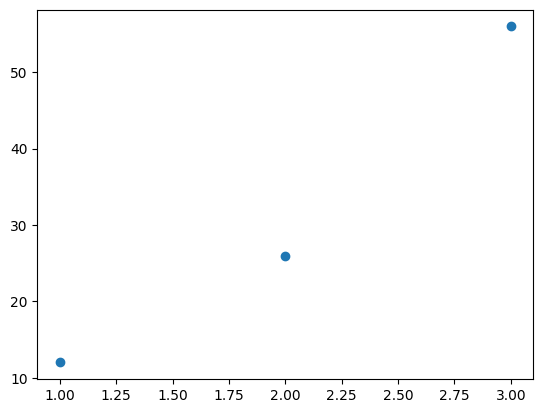

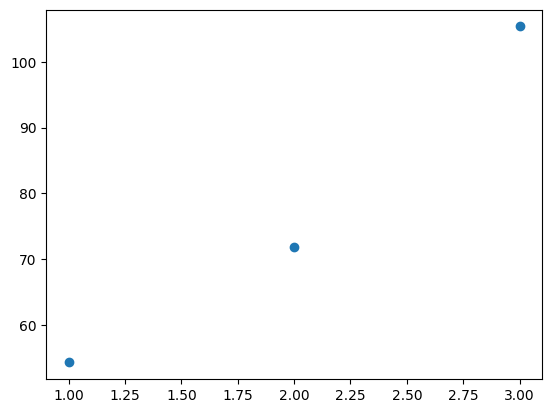

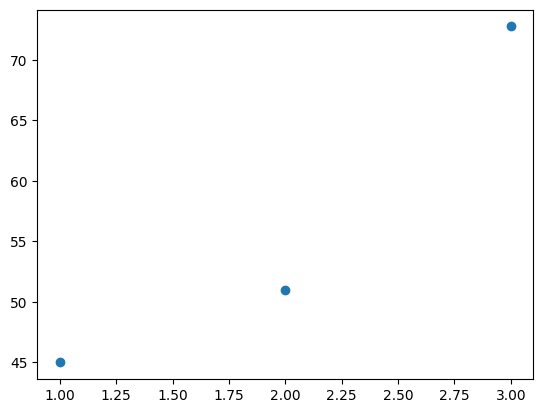

In [101]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.scatter(df.index,df['女生比率'])
plt.figure(2)
plt.scatter(df.index,df['战斗力'])
plt.figure(3)
plt.scatter(df.index,df['capture_rate'])
plt.show()